In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [181]:
#Importing the data
leadscore = pd.read_excel('intern.xlsx')
leadscore.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [182]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.3+ MB


In [183]:
#As we can see from the data, many columns contain text values as ''9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', which means null actually.
#Hence we convert them to null

In [184]:
leadscore.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan, inplace=True)

In [185]:
leadscore.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [186]:
leadscore.isnull().sum()*100/len(leadscore)

Agent_id           0.000000
status             0.000000
lost_reason        7.217645
budget             7.938551
lease              5.022743
movein            29.261071
source            12.823979
source_city       18.990302
source_country    18.539736
utm_source         0.130879
utm_medium         6.837882
des_city           5.443272
des_country        5.443272
room_type         50.521370
lead_id            0.000000
dtype: float64

In [187]:
leadscore['des_country'].value_counts(normalize=True) * 100

8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19    96.830115
02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae     1.685916
80db4ccdca106d37b920206331fcfe3e9e50a9e763d89b54ce3ad5ac8cf30f03     0.367589
be55ef3f4c4e6c2d9c2afe2a33ac90ad0f50d4de7f9163999877e2a9ca5a54f8     0.338091
7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2c06066bee6270d5153     0.258674
c1ef40ce0484c698eb4bd27fe56c1e7b68d74f9780ed674210d0e5013dae45e9     0.174718
5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc     0.129337
49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd     0.058996
abd149214539d9f222d25de6358735b9fa0efd3956f66102b2c119ae2d9f6348     0.052189
8ef41e6f4b07432a0cb4eb7a8774e7a3878fd3e385f49aa09b406768467db228     0.049919
4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d     0.038574
3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7     0.009076
2275583196d791405892aaca0d87743c872f3fc0cf3308a6c3ef82528918aa8a

In [188]:
#We can drop columns like country as these column tend to have a very high percentage of only one particular value.
#We can drop room type as it as 50% null values

In [189]:
leadscore = leadscore.drop(['des_country','room_type'],axis=1)

In [190]:
#we can drop agent id and lead is as they all are unique

In [191]:
leadscore = leadscore.drop(['Agent_id','lead_id'],axis=1)

In [192]:
leadscore['budget'].value_counts(normalize=True) * 100

£60 - £120 Per week     22.984059
£121 - £180 Per Week    20.867903
0-0                     13.361145
£181 - £240 Per Week     5.059663
100                      3.533141
                          ...    
0-80-100$                0.002331
0-235                    0.002331
£120-160 Per Week        0.002331
1400 per month           0.002331
0-500 PCM                0.002331
Name: budget, Length: 1857, dtype: float64

In [193]:
#As mentioned in the Assignment to treat all the columns as categorical, we will replace null value with MODE

In [194]:
leadscore.isnull().sum()*100/len(leadscore)

status             0.000000
lost_reason        7.217645
budget             7.938551
lease              5.022743
movein            29.261071
source            12.823979
source_city       18.990302
source_country    18.539736
utm_source         0.130879
utm_medium         6.837882
des_city           5.443272
dtype: float64

In [195]:
leadscore.shape

(46608, 11)

In [196]:
# As all other values in status except LOST and WON can be droped

In [197]:
leadscore = leadscore[leadscore.status != 'OPPORTUNITY']

In [198]:
leadscore = leadscore[leadscore.status != 'CONTACTED']

In [199]:
leadscore = leadscore[leadscore.status != 'PROCESSING']

In [200]:
leadscore = leadscore[leadscore.status != 'IMPORTANT']

In [201]:
leadscore['status'].value_counts(normalize=True) * 100

LOST    93.365287
WON      6.634713
Name: status, dtype: float64

In [202]:
leadscore['lost_reason'].fillna(leadscore['lost_reason'].mode()[0],inplace=True)

In [203]:
leadscore['budget'].fillna(leadscore['budget'].mode()[0],inplace=True)

In [204]:
leadscore['lease'].fillna(leadscore['lease'].mode()[0],inplace=True)

In [205]:
leadscore['movein'].fillna(leadscore['movein'].mode()[0],inplace=True)

In [206]:
leadscore['source'].fillna(leadscore['source'].mode()[0],inplace=True)

In [207]:
leadscore['source_city'].fillna(leadscore['source_city'].mode()[0],inplace=True)

In [208]:
leadscore['utm_source'].fillna(leadscore['utm_source'].mode()[0],inplace=True)

In [209]:
leadscore['utm_medium'].fillna(leadscore['utm_medium'].mode()[0],inplace=True)

In [210]:
leadscore = leadscore.drop('des_city',axis=1)

# All the data is cleaned and preprocessed

In [211]:
leadscore.isnull().sum()*100/len(leadscore)

status             0.000000
lost_reason        0.000000
budget             0.000000
lease              0.000000
movein             0.000000
source             0.000000
source_city        0.000000
source_country    18.615195
utm_source         0.000000
utm_medium         0.000000
dtype: float64

# We have to create dummy variables as all the data is in object/string form

In [212]:
#converting status to a binary value 

leadscore['status'] = np.where(leadscore.loc[:, 'status'].isin(['LOST']), 0, 1)

In [213]:
leadscore.head()

,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium
0,0,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-09-10 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...
1,0,Low budget,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-09-10 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...
2,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...
3,0,Low budget,0-0,0,2022-09-10 00:00:00,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...
4,0,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-09-10 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...


In [214]:
dummy = pd.get_dummies(leadscore[['lost_reason','budget','lease','movein','source','source_city',
                                 'source_country','utm_source','utm_medium']],drop_first=True)

# Add the results to the master dataframe
leadscore = pd.concat([leadscore, dummy], axis=1)

#Drop the columns for which dummy variable are created

leadscore = leadscore.drop(['lost_reason','budget','lease','movein','source','source_city',
                                 'source_country','utm_source','utm_medium'],1)

C:\Users\om gaikwad\AppData\Local\Temp\ipykernel_22880\681153933.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leadscore = leadscore.drop(['lost_reason','budget','lease','movein','source','source_city',


In [215]:
leadscore.head()

,status,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,...,utm_medium_b605dfc9f2d27244a0eec4af868c8824a8594b53a1a301749e057530773aaee2,utm_medium_b63e8cbf8e6420de05ac114aa13dd470b71efb73b60bc48d49443288261a514b,utm_medium_c110c415b06d01be691c31691217bbad32cb6571a9499ce8e63dc3b461b11373,utm_medium_c44bb2fd516909dab78ae0bfedcd5672b131b996c4b7a4328ee55fba170da776,utm_medium_ca343dd3402f42da61719d1bf6c5efba5ee53e7e364d46bbcbaed577387122ab,utm_medium_d6a969fff41c54131a4743aeef27fc6d96da8b6ee9407579aa4717cbf0759e73,utm_medium_dfd76b3ecbefe4606d9cbfa7e7c41884b22d214a0c13560bb7eb10e65c11851f,utm_medium_e0c8dadcdcfe98ff57df45c4f2ac8e718b77db454dfe02ab7210e8d94fcda248,utm_medium_e24fdf242e61d90469c1912851b1c400e6d4e6aa70e281b5186aad6ffe9fed7e,utm_medium_efbfd394ac2dc6f05e74e167113f414b0fa50b64f82dfbbdb63936640332d6d4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [217]:
X = leadscore.drop(['status'],1)
X.head()

C:\Users\om gaikwad\AppData\Local\Temp\ipykernel_22880\3313687300.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = leadscore.drop(['status'],1)


,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,...,utm_medium_b605dfc9f2d27244a0eec4af868c8824a8594b53a1a301749e057530773aaee2,utm_medium_b63e8cbf8e6420de05ac114aa13dd470b71efb73b60bc48d49443288261a514b,utm_medium_c110c415b06d01be691c31691217bbad32cb6571a9499ce8e63dc3b461b11373,utm_medium_c44bb2fd516909dab78ae0bfedcd5672b131b996c4b7a4328ee55fba170da776,utm_medium_ca343dd3402f42da61719d1bf6c5efba5ee53e7e364d46bbcbaed577387122ab,utm_medium_d6a969fff41c54131a4743aeef27fc6d96da8b6ee9407579aa4717cbf0759e73,utm_medium_dfd76b3ecbefe4606d9cbfa7e7c41884b22d214a0c13560bb7eb10e65c11851f,utm_medium_e0c8dadcdcfe98ff57df45c4f2ac8e718b77db454dfe02ab7210e8d94fcda248,utm_medium_e24fdf242e61d90469c1912851b1c400e6d4e6aa70e281b5186aad6ffe9fed7e,utm_medium_efbfd394ac2dc6f05e74e167113f414b0fa50b64f82dfbbdb63936640332d6d4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
y = leadscore['status']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int32

In [219]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [220]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (32421, 7930)
y_train Size (32421,)


In [222]:
import statsmodels.api as sm

In [224]:
model = LogisticRegression()

In [225]:
model.fit(X_train,y_train)

C:\Users\om gaikwad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

# As mentioned in the assignment we have to give leadscore as a output from 0-100
# here is the probablity ranging between 0-10 which is OUR LEADSCORE


In [234]:
model.predict_proba(X_test)

array([[9.99890744e-01, 1.09255645e-04],
       [9.99920460e-01, 7.95396616e-05],
       [9.99269630e-01, 7.30369741e-04],
       ...,
       [9.99984866e-01, 1.51343697e-05],
       [8.26759708e-01, 1.73240292e-01],
       [9.99973081e-01, 2.69188002e-05]])

In [229]:
predictions = model.predict(X_test)

In [230]:
# Model Evaluation

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12974
           1       0.67      0.41      0.51       922

    accuracy                           0.95     13896
   macro avg       0.81      0.70      0.74     13896
weighted avg       0.94      0.95      0.94     13896



In [231]:
# Check confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(y_test,predictions)

array([[12785,   189],
       [  544,   378]], dtype=int64)

In [232]:
accuracy_score(y_test, predictions)

0.9472510074841681

[Text(0.5, 1.0, 'Predictions made by the model')]

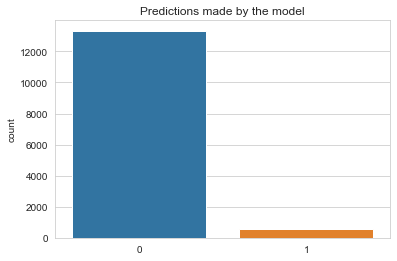

In [233]:
sns.set_style('whitegrid')
sns.countplot(x=predictions).set(title='Predictions made by the model')

# THE ACCURACY SCORE OF THE MODEL IS AROUND 94% ,SO IT IS A GOOD MODEL